In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='xgboost')  # Suppress XGBoost warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.discriminant_analysis')  # Suppress collinearity warnings

In [25]:
df = pd.read_csv('data/public/insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [26]:
df.replace('?', np.nan, inplace = True)

In [27]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


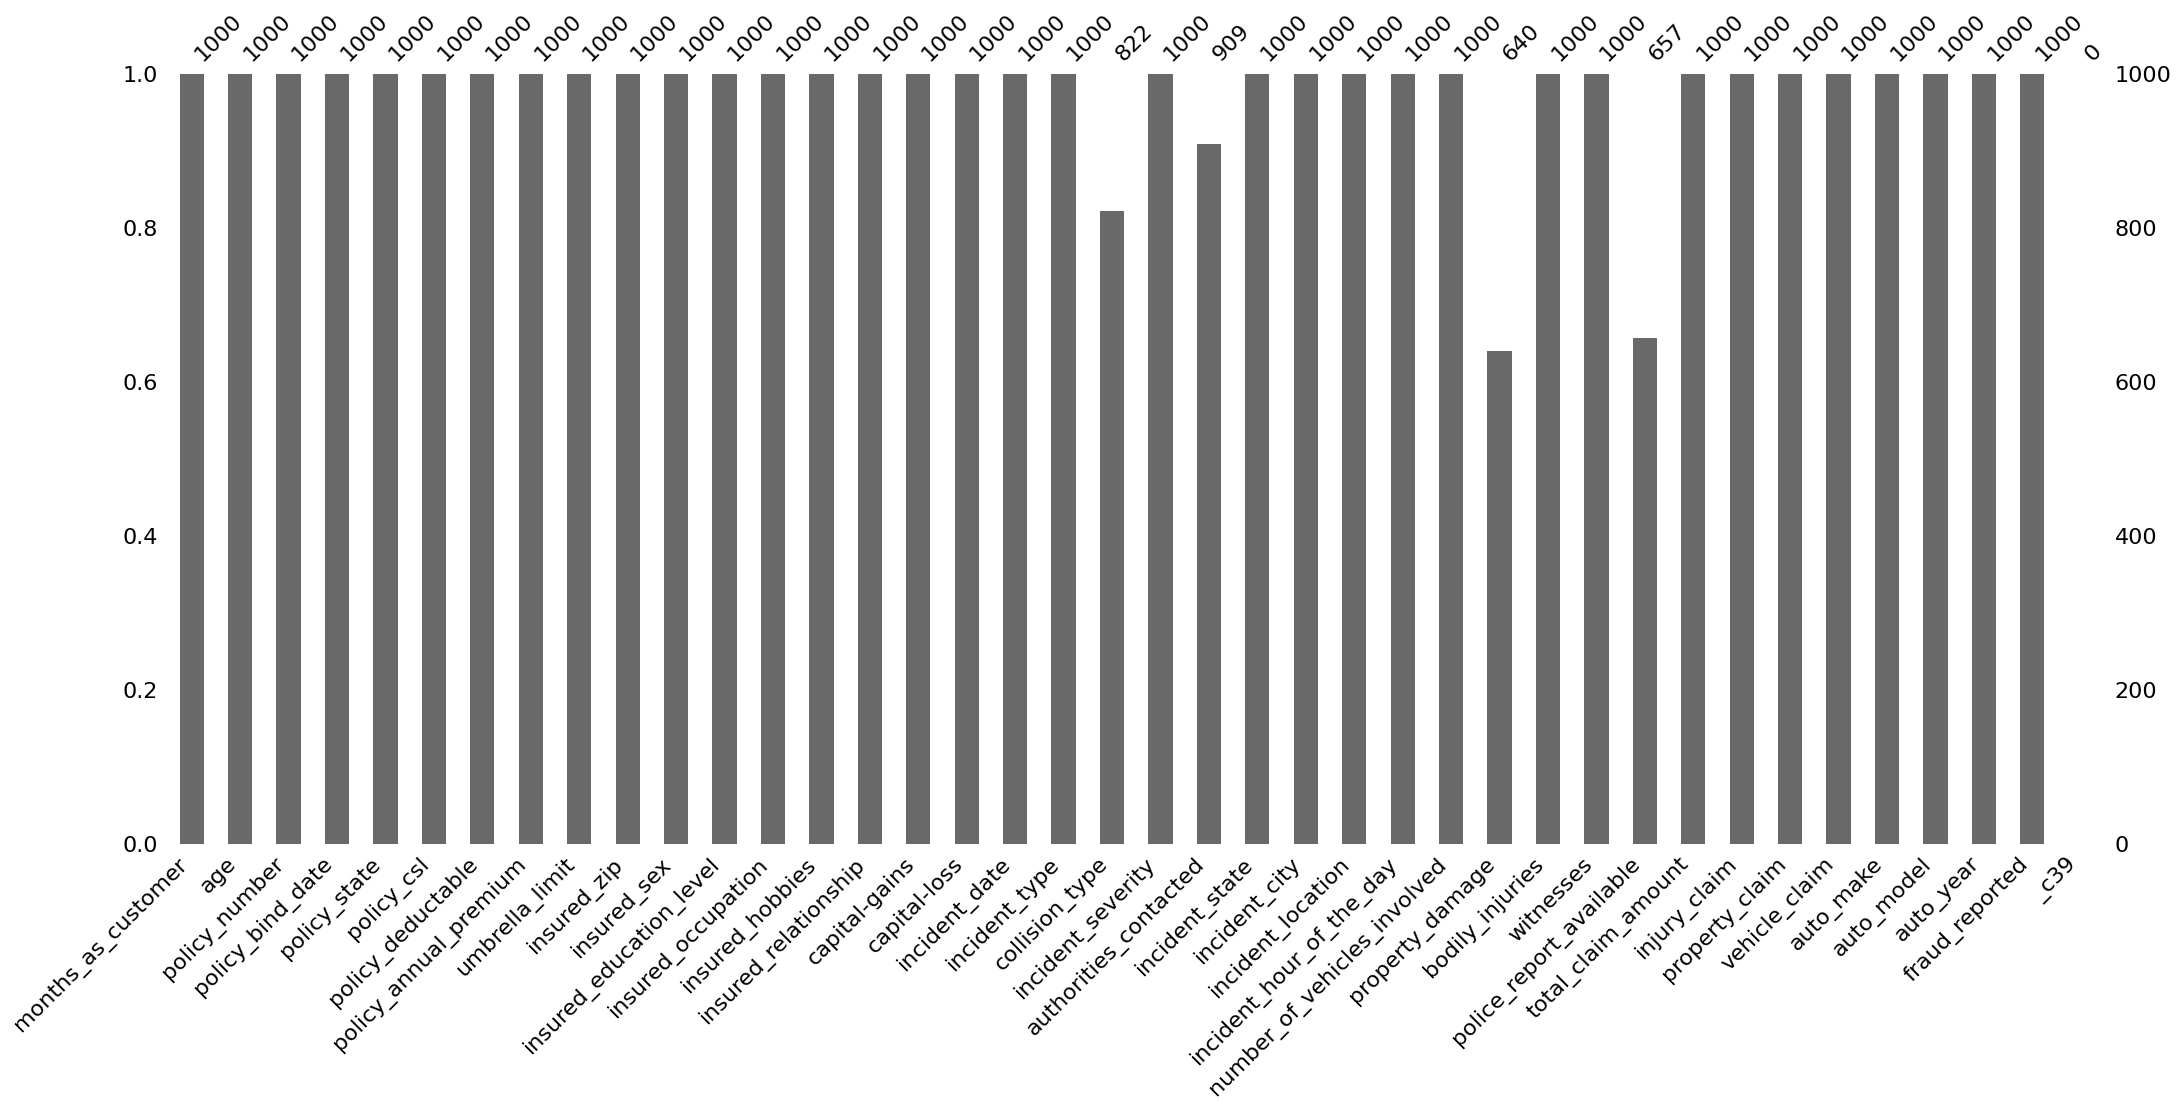

In [28]:
# df.isna().sum()
ms.bar(df)
plt.show()

In [29]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [30]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [31]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [32]:
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

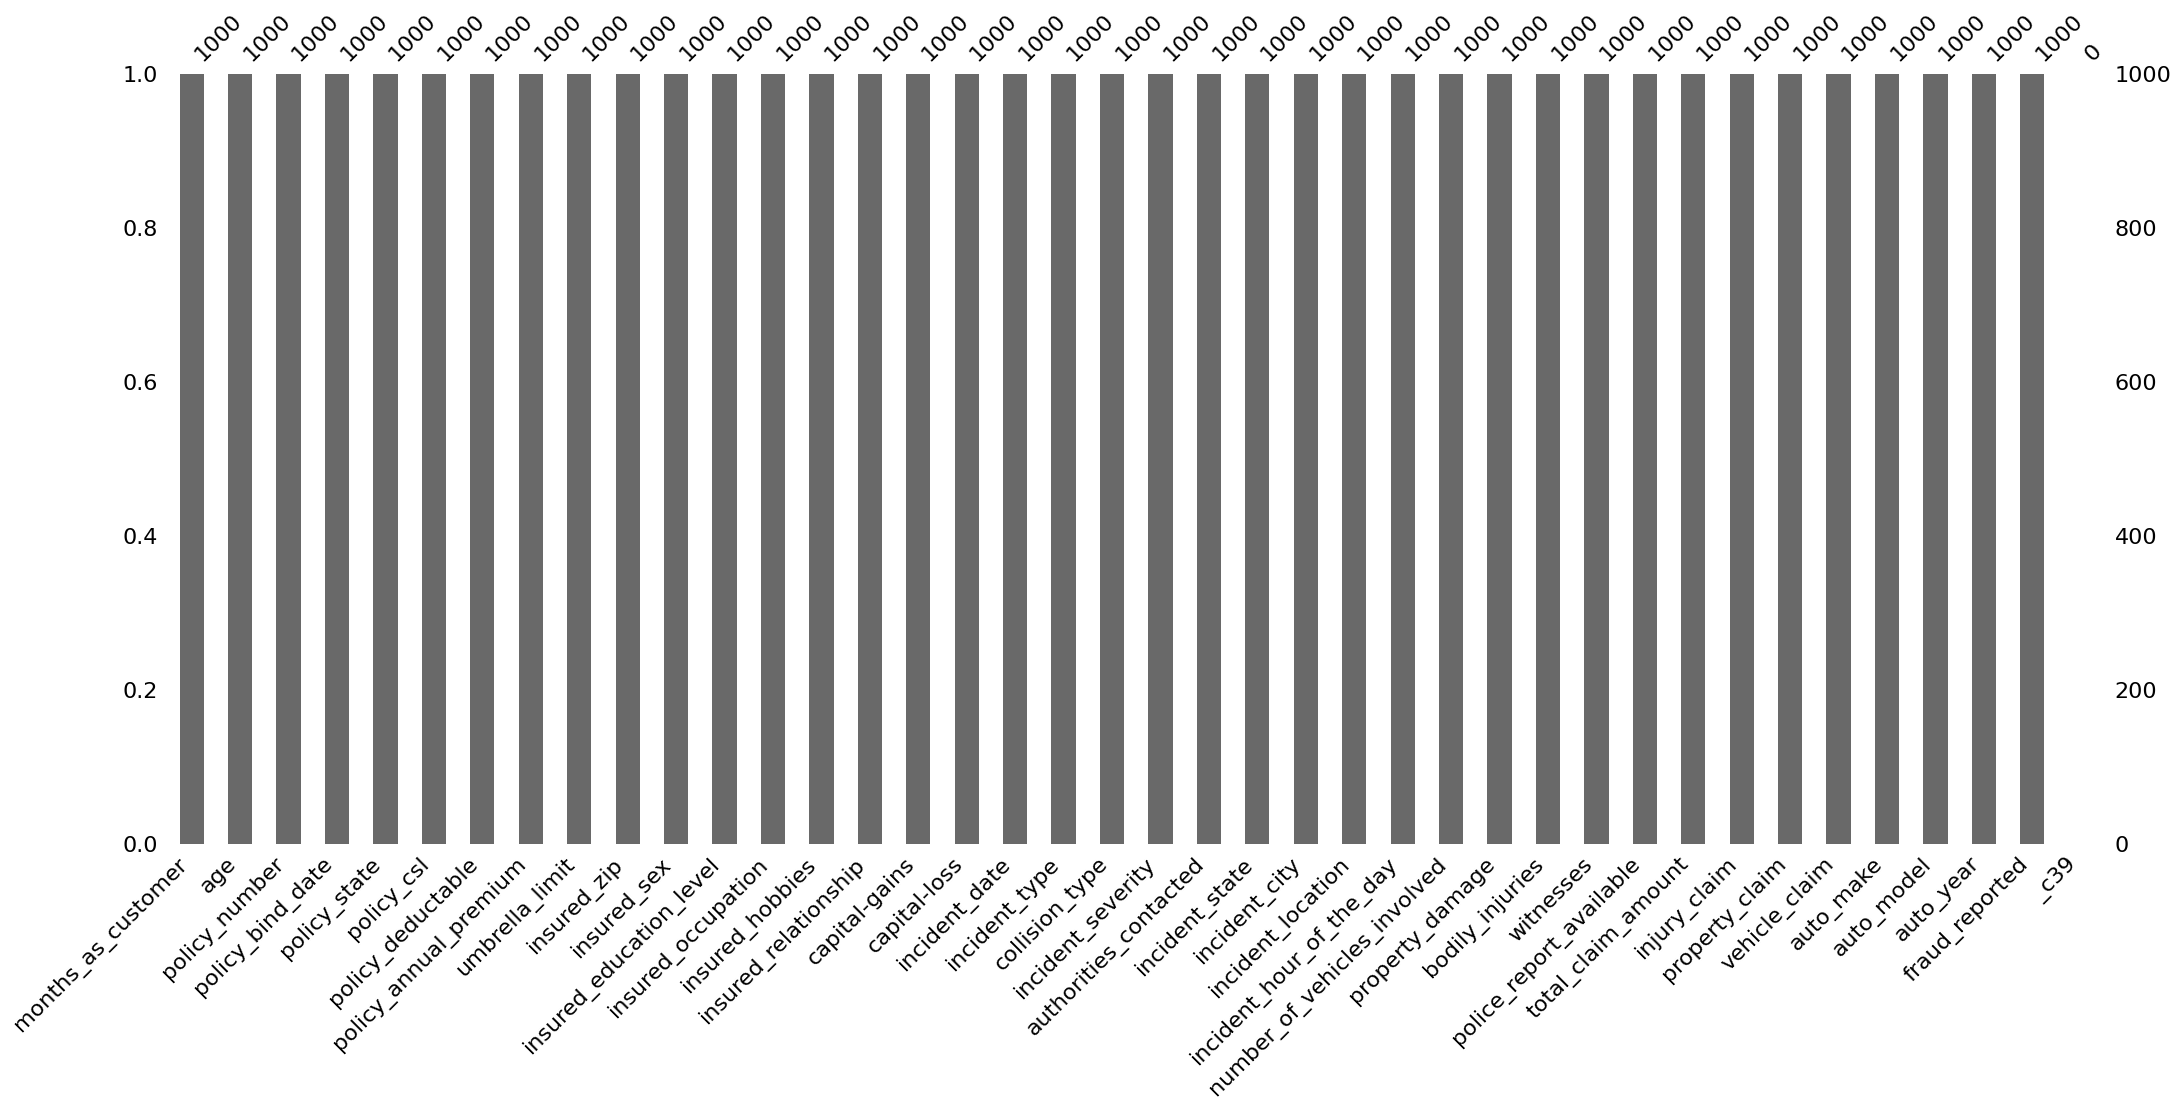

In [33]:
ms.bar(df)
plt.show()

In [34]:
# printing unique values of each column
cat_df = df.select_dtypes(include = ['object'])
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_bind_date: 
['2014-10-17' '2006-06-27' '2000-09-06' '1990-05-25' '2014-06-06'
 '2006-10-12' '2000-06-04' '1990-02-03' '1997-02-05' '2011-07-25'
 '2002-05-26' '1999-05-29' '1997-11-20' '2012-10-26' '1998-12-28'
 '1992-10-19' '2005-06-08' '2004-11-15' '2014-12-28' '1992-08-02'
 '2002-06-25' '2005-11-27' '1994-05-27' '1991-02-08' '1996-02-02'
 '2013-12-05' '1990-09-20' '2002-07-18' '1990-02-08' '2014-03-04'
 '2000-02-18' '2008-06-19' '2003-08-01' '1992-04-04' '1991-01-13'
 '2010-08-08' '2003-03-09' '1993-02-03' '2002-11-25' '1997-07-27'
 '1995-05-08' '2012-08-30' '2006-04-30' '2003-04-13' '2007-12-05'
 '2006-08-21' '1990-01-08' '1990-03-18' '2008-01-07' '1997-03-10'
 '2004-01-10' '1994-08-20' '2002-06-02' '1994-04-28' '2014-08-17'
 '2007-08-11' '2008-11-20' '1995-10-18' '1993-05-19' '2005-02-26'
 '1990-02-14' '1993-09-30' '2014-06-10' '2008-10-28' '2007-04-24'
 '1993-12-13' '2011-08-17' '1990-08-20' '1994-02-11' '1994-02-22'
 '2011-08-15' '1998-11-11' '1995-12-04' '2002-12-28' '200

In [35]:
# dropping columns which are not necessary for prediction

to_drop = [
    'age',
    'policy_number',
    'policy_bind_date',
    'insured_zip',
    'incident_date',
    'incident_state',
    'incident_location',
    'total_claim_amount',
    '_c39'
]

df.drop(to_drop, inplace = True, axis = 1)

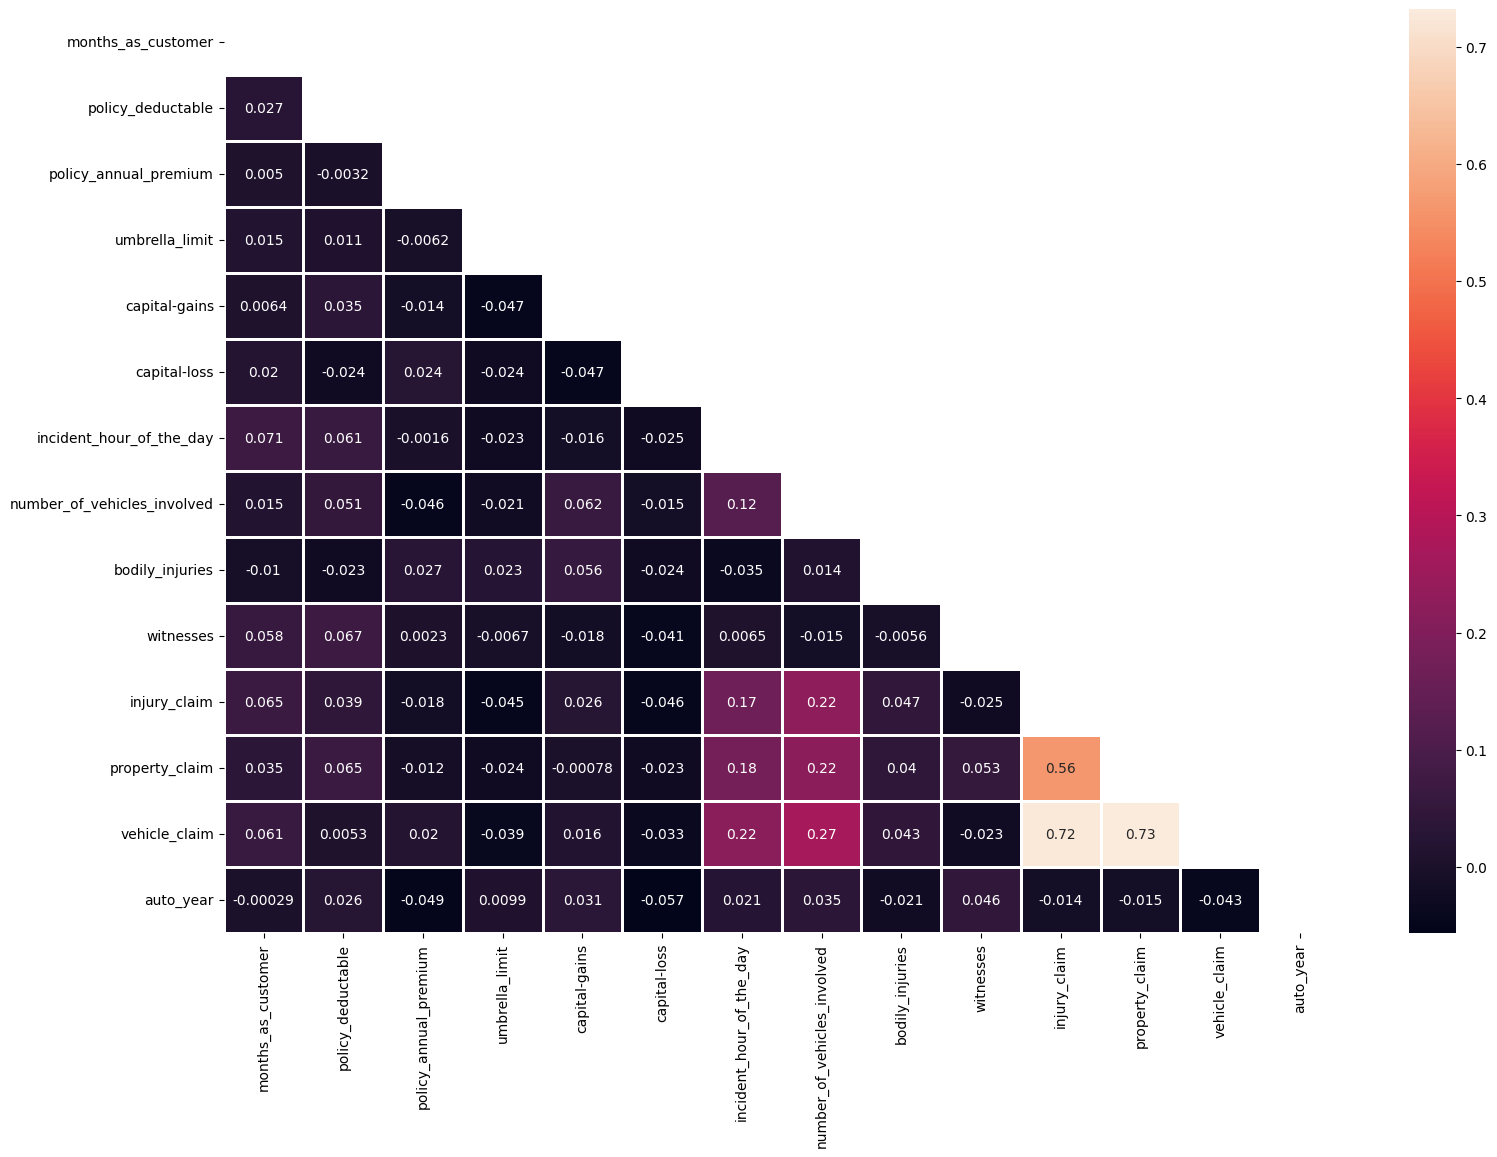

In [36]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

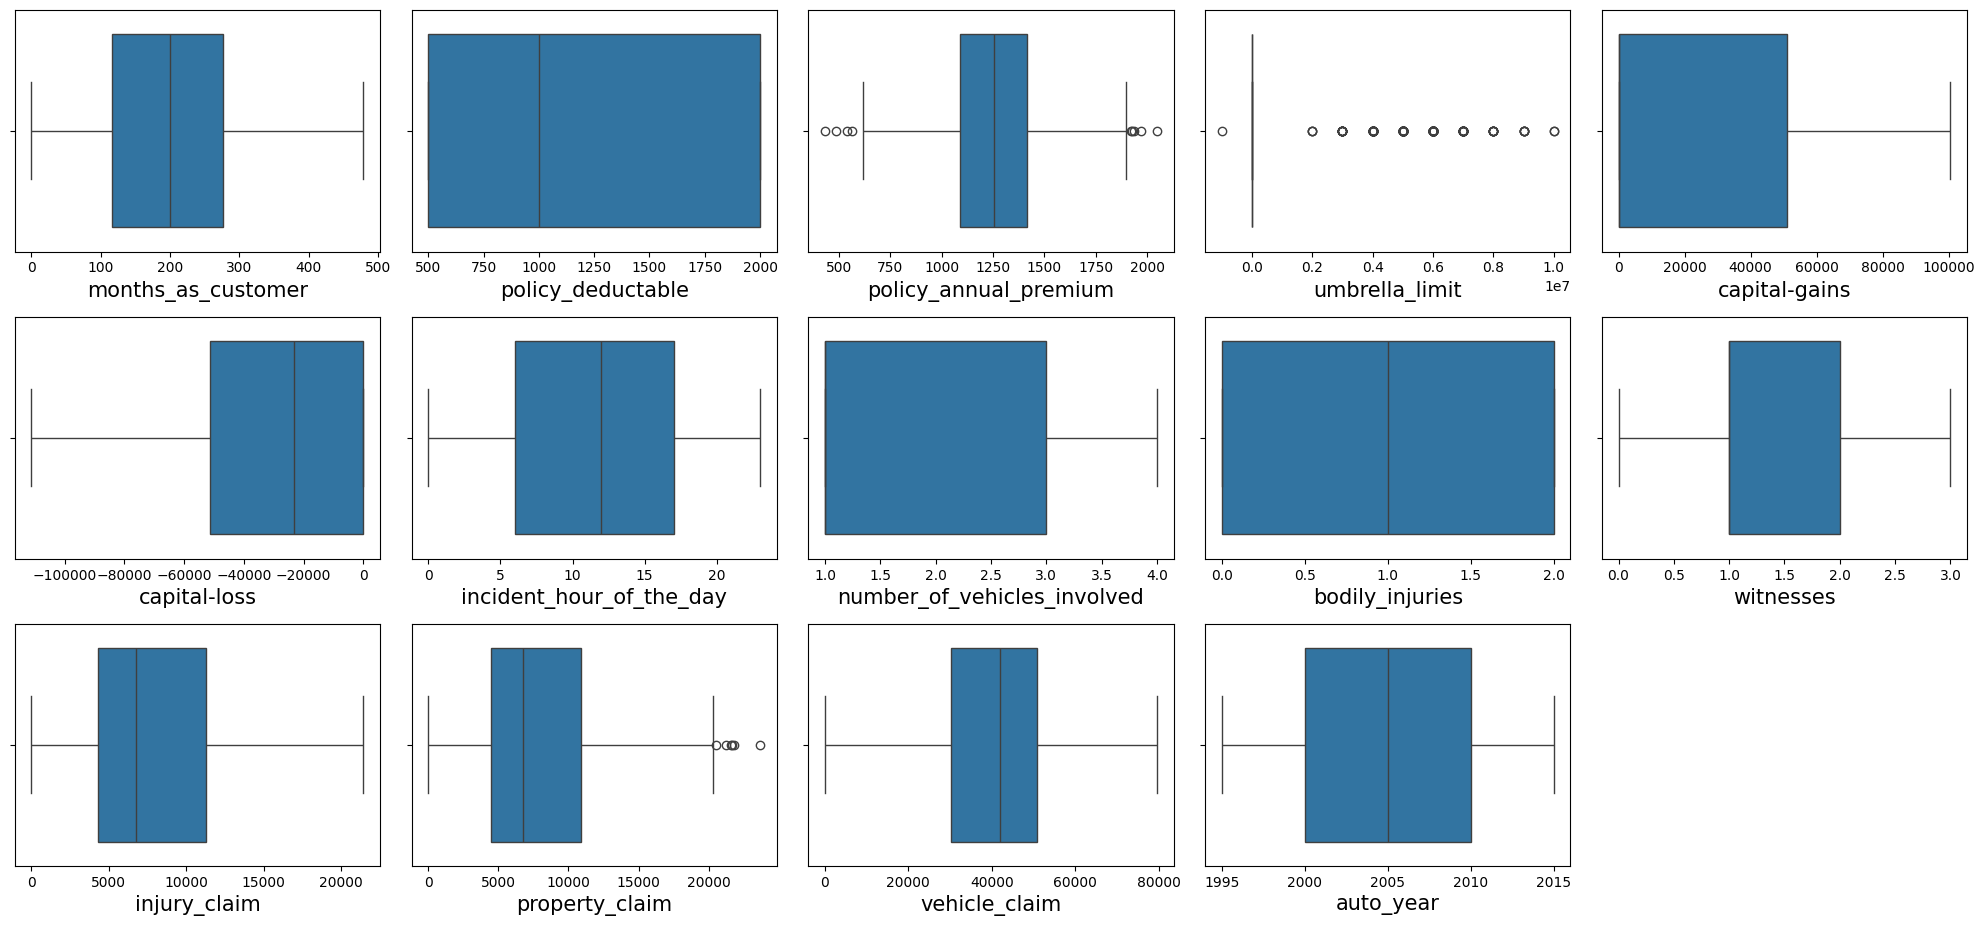

In [43]:
# Filter numerical columns only
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
plotnumber = 1

for col in numerical_columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(x=df[col], ax=ax)  # Use 'x=' to specify the column for boxplot
        plt.xlabel(col, fontsize=15)
    
    plotnumber += 1

plt.tight_layout()
plt.show()

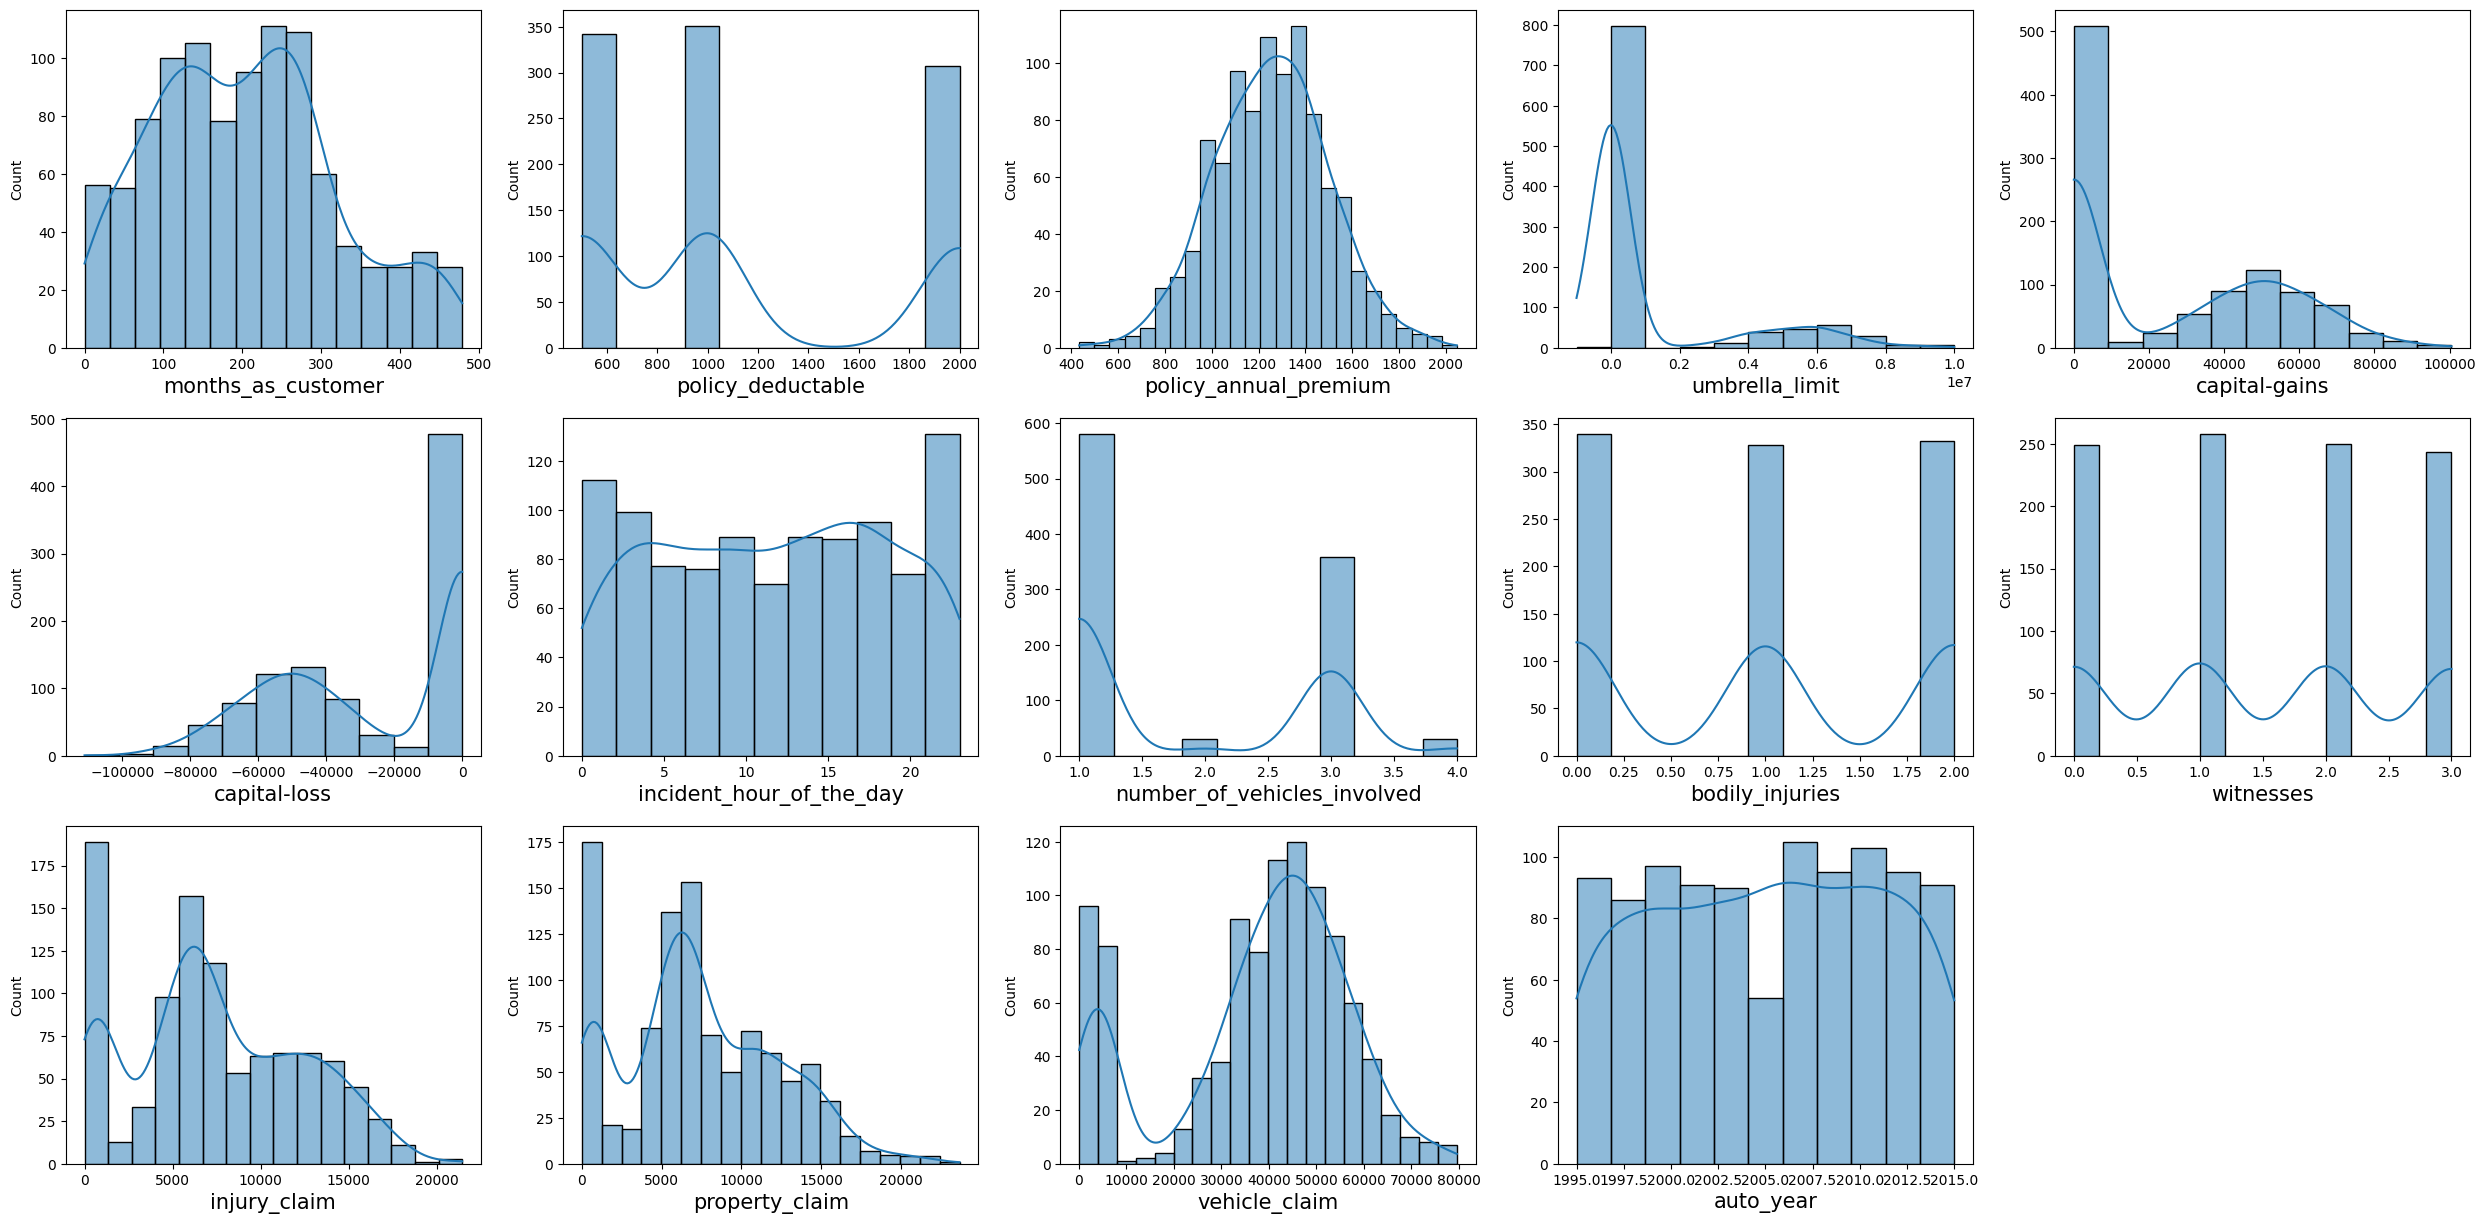

In [44]:
plt.figure(figsize=(25, 20))
plotnumber = 1

for col in numerical_columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        
        # Plot histogram with KDE line
        sns.histplot(df[col], kde=True, ax=ax)  # kde=True adds the line
        plt.xlabel(col, fontsize=15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

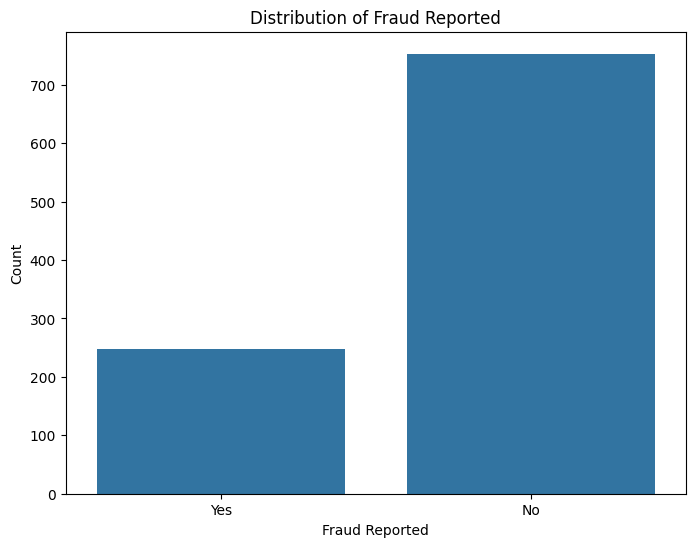

In [39]:
# Plot the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df['fraud_reported'])
plt.title(f'Distribution of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.xticks(['N', 'Y'], ['No', 'Yes'])  # Customize labels if the target is binary (0, 1)
plt.show()

In [40]:
def preprocess_features(data, target_column):
    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Encode the target variable to binary (0 and 1)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Separate numerical and categorical features
    num_df = X.select_dtypes(include=['int64', 'float64'])
    cat_df = X.select_dtypes(include=['category', 'object'])

    # One-hot encode categorical features, dropping the first category to avoid multicollinearity
    cat_df = pd.get_dummies(cat_df, drop_first=True)

    # Scale numerical features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(num_df)
    scaled_num_df = pd.DataFrame(data=scaled_data, columns=num_df.columns, index=num_df.index)

    # Concatenate scaled numerical features and one-hot encoded categorical features
    X = pd.concat([scaled_num_df, cat_df], axis=1)

    return X, y

# Example usage
X, y = preprocess_features(df, target_column='fraud_reported')

# Display the first few rows of the processed features
X.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1.078140,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,...,False,False,False,False,False,False,False,False,False,False
1,0.208995,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,...,False,False,False,False,False,False,False,False,False,False
2,-0.608002,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,...,False,True,False,False,False,False,False,False,False,False
3,0.452355,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,...,False,False,False,False,False,True,False,False,False,False
4,0.208995,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,...,False,False,True,False,False,False,False,False,False,False


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Function to train and evaluate models
def test_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for model_name, model in models.items():
        print(f'\n{model_name}:')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy:.4f}')
        print('\nClassification Report:')
        print(classification_report(y_test, y_pred))
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred))
        
        # Store results
        results[model_name] = {
            'model': model,
            'accuracy': accuracy,
            'classification_report': classification_report(y_test, y_pred, output_dict=True),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }
    
    return results

# Define models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier()
}

# Test the models
results = test_models(X_train, X_test, y_train, y_test, models)


Logistic Regression:
Accuracy: 0.7333

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       220
           1       0.50      0.36      0.42        80

    accuracy                           0.73       300
   macro avg       0.64      0.62      0.62       300
weighted avg       0.71      0.73      0.72       300

Confusion Matrix:
[[191  29]
 [ 51  29]]

Random Forest:
Accuracy: 0.7233

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       220
           1       0.38      0.06      0.11        80

    accuracy                           0.72       300
   macro avg       0.56      0.51      0.47       300
weighted avg       0.64      0.72      0.64       300

Confusion Matrix:
[[212   8]
 [ 75   5]]

Gradient Boosting:
Accuracy: 0.7633

Classification Report:
              precision    recall  f1-score   support

           0       0.81     

Best overall with unbalanced target var (based on the recall and accuracy):
- LDA
- XGBoost